<a href="https://colab.research.google.com/github/Abdelmalek-Djemaa/Tweet-Emotion-Recognition-Natural-Language-Processing-with-TensorFlow/blob/main/Copie_de_Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow


## Task 1: Setup and Imports


1. Importing libraries

In [20]:
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 2: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [10]:
data = pd.read_pickle("/content/merged_training.pkl")

In [19]:
print(data)
print(data.shape)

                                                     text emotions
27383   i feel awful about it too because it s my job ...  sadness
110083                              im alone i feel awful  sadness
140764  ive probably mentioned this before but i reall...      joy
100071           i was feeling a little low few days back  sadness
2837    i beleive that i am much more sensitive to oth...     love
...                                                   ...      ...
566     that was what i felt when i was finally accept...      joy
36236   i take every day as it comes i m just focussin...     fear
76229       i just suddenly feel that everything was fake  sadness
131640  im feeling more eager than ever to claw back w...      joy
64703   i give you plenty of attention even when i fee...  sadness

[416809 rows x 2 columns]
(416809, 2)


In [43]:

# Assuming the first column is the feature and the second column is the label
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Split the data into training+validation (80%) and test sets (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training (80%) and validation sets (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Print the shapes of the splits to confirm
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Ensure the data is in the correct format for TensorFlow
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Training set shape (TensorFlow): {X_train.shape}, {y_train.shape}")
print(f"Validation set shape (TensorFlow): {X_val.shape}, {y_val.shape}")
print(f"Test set shape (TensorFlow): {X_test.shape}, {y_test.shape}")


Training set shape: (250085,), (250085,)
Validation set shape: (83362,), (83362,)
Test set shape: (83362,), (83362,)
Training set shape (TensorFlow): (250085,), (250085,)
Validation set shape (TensorFlow): (83362,), (83362,)
Test set shape (TensorFlow): (83362,), (83362,)


In [44]:
for tweet in range(5) :
  print(f"tweet : {X_train[tweet]}\n-> label : {y_train[tweet]}")

tweet : i told him about how i was feeling helpless about my health and he shuffled the cards
-> label : fear
tweet : im just thankful that my hair feels moisturized but just to be sure im going to do a conditioning treatment since i havent done one in a few wks and be more mindful about maintaining these treatments
-> label : joy
tweet : im frustrated at myself for how i feel i know shes sincere i know she means these things
-> label : joy
tweet : i could feel safe enough doing so
-> label : joy
tweet : i have no idea what kind they are but i feel assured that they are valuable and necessary so i attempt to rescue each one
-> label : joy


## Task 3: Tokenizer

1. Tokenizing the tweets

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Initialize a Tokenizer object with parameters:
# 'num_words=10000' sets the maximum number of words to keep based on word frequency, limiting to the 10,000 most common words.
# 'oov_token="<UNK>"' sets the token to use for out-of-vocabulary words.
tokenizer = Tokenizer(num_words=10000, oov_token="<UNK>")

# Fit the tokenizer on the training data 'X_train'.
# This updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(X_train)

## Task 4: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

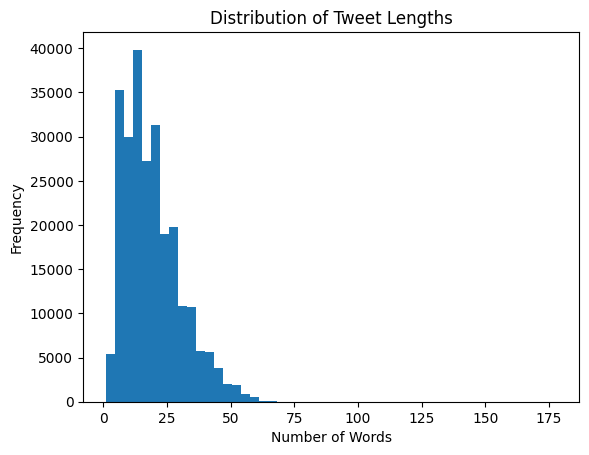

In [70]:
# Calculate the lengths of the tweets
lengths = [len(tweet.split(' ')) for tweet in X_train]

plt.hist(lengths, bins=50)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')

plt.show()

In [57]:
max_length = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [83]:
# Convert the training texts into sequences of integers.
# Each word in the texts is replaced with its corresponding integer from the tokenizer's word index.
sequences = tokenizer.texts_to_sequences(X_train)

# Pad the sequences to ensure that they all have the same length.
# 'maxlen' specifies the maximum length of the sequences after padding.
# 'padding='post'' ensures that padding is added to the end of the sequences.
# 'truncating='post'' ensures that sequences longer than 'maxlen' are truncated at the end.
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [59]:
print(padded_sequences[0])

[   2  300   80   28   54    2   22    8  286   28   11 1044    4   65
    1    6 1881    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


## Task 5: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [61]:
classes = set(y_train)
print(classes)

{'joy', 'sadness', 'fear', 'anger', 'love', 'surprise'}


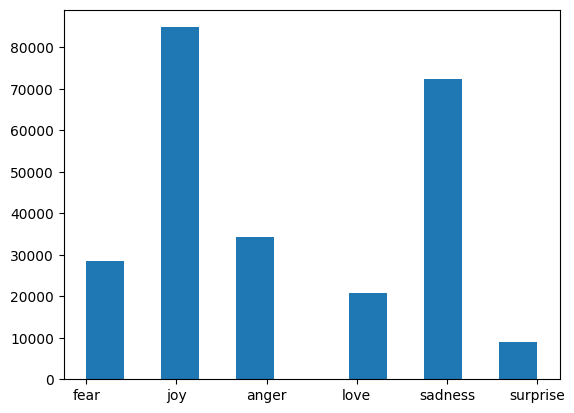

In [67]:
plt.hist(y_train, bins=12)
plt.show()

In [71]:
classe_to_index = dict((classe , index ) for index, classe in enumerate(classes))
print(classe_to_index)

{'joy': 0, 'sadness': 1, 'fear': 2, 'anger': 3, 'love': 4, 'surprise': 5}


In [72]:
# Convert class labels to numerical values using the mapping
y_train_numeric = [classe_to_index[label] for label in y_train]

In [75]:
print (f"class {y_train_numeric[0]} : {y_train[0]}")

class 2 : fear


## Task 6: Creating the Model

1. Creating the model
2. Compiling the model

In [79]:
# Define your model using the Sequential API
model = tf.keras.Sequential([
    # Embedding layer: Maps each word index to a dense vector representation
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=max_length),

    # Bidirectional LSTM layer: Processes input in both forward and backward directions
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20, return_sequences=True)),

    # Bidirectional LSTM layer: Processes input in both forward and backward directions
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20)),

    # Dense (fully connected) layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(units=6, activation='softmax')
])

# Compile the model with specified loss function, optimizer, and metrics
model.compile(
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    optimizer='adam',  # Optimizer to update weights based on gradient descent
    metrics=['accuracy']  # Metrics to evaluate during training and testing
)


In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 50, 40)            5920      
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 7: Training the Model

1. Preparing a validation set
2. Training the model

In [84]:
# Preparing the validation set

sequences_val = tokenizer.texts_to_sequences(X_val)

padded_sequences_val = pad_sequences(sequences_val, maxlen=max_length, padding='post', truncating='post')

y_val_numeric = [classe_to_index[label] for label in y_val]


In [85]:
print (f"class {y_val_numeric[0]} : {y_val[0]}")

class 0 : joy


In [88]:
# Ensure padded_sequences and padded_sequences_val are numpy arrays
padded_sequences = np.array(padded_sequences)
padded_sequences_val = np.array(padded_sequences_val)

# Ensure y_train_numeric and y_val_numeric are numpy arrays
y_train_numeric = np.array(y_train_numeric)
y_val_numeric = np.array(y_val_numeric)

# Training the model
history = model.fit(
    padded_sequences,      # Training data: numpy array of padded sequences of tweets
    y_train_numeric,       # Training labels: numpy array of numeric labels
    validation_data=(padded_sequences_val, y_val_numeric),  # Validation data for monitoring performance
    epochs=20,             # Number of epochs (iterations over the entire dataset)
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
    # Early stopping callback: Monitors validation loss and stops training if no improvement after 2 epochs
)

Epoch 1/20
7816/7816 [==============================] - 161s 20ms/step - loss: 0.3269 - accuracy: 0.8719 - val_loss: 0.1319 - val_accuracy: 0.9322
Epoch 2/20
7816/7816 [==============================] - 127s 16ms/step - loss: 0.1090 - accuracy: 0.9369 - val_loss: 0.1026 - val_accuracy: 0.9379
Epoch 3/20
7816/7816 [==============================] - 132s 17ms/step - loss: 0.0969 - accuracy: 0.9403 - val_loss: 0.0994 - val_accuracy: 0.9365
Epoch 4/20
7816/7816 [==============================] - 131s 17ms/step - loss: 0.0919 - accuracy: 0.9414 - val_loss: 0.0982 - val_accuracy: 0.9387
Epoch 5/20
7816/7816 [==============================] - 125s 16ms/step - loss: 0.0894 - accuracy: 0.9433 - val_loss: 0.0973 - val_accuracy: 0.9370
Epoch 6/20
7816/7816 [==============================] - 125s 16ms/step - loss: 0.0869 - accuracy: 0.9438 - val_loss: 0.1020 - val_accuracy: 0.9364
Epoch 7/20
7816/7816 [==============================] - 124s 16ms/step - loss: 0.0845 - accuracy: 0.9454 - val_loss: 0

## Task 8: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

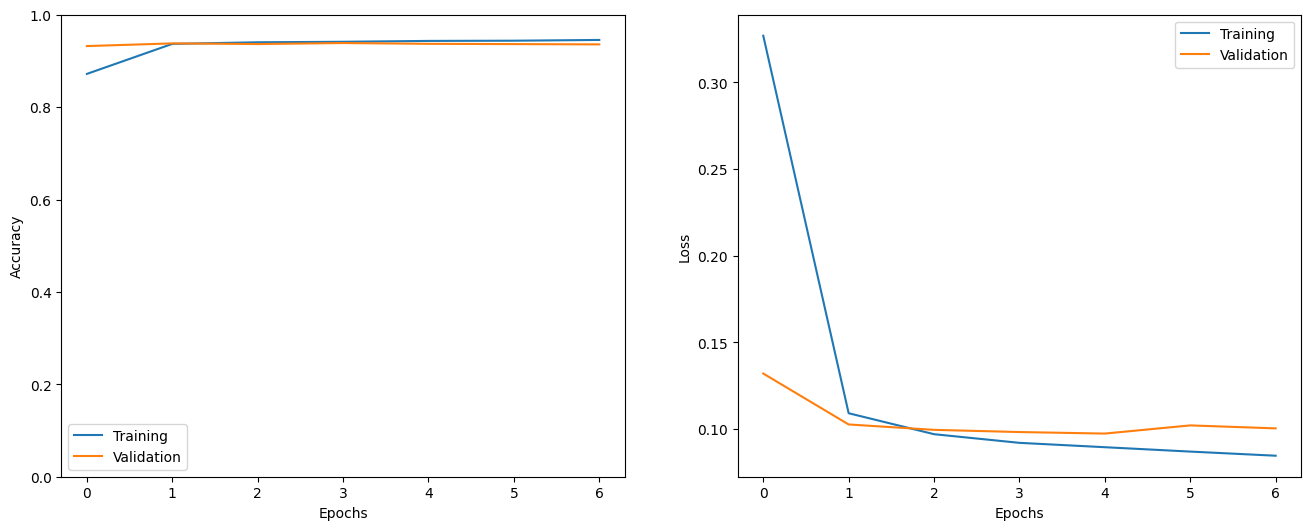

In [103]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


show_history(history)

In [91]:
#Prepraring a test set

sequences_test = tokenizer.texts_to_sequences(X_test)

padded_sequences_test = pad_sequences(sequences_test, maxlen=max_length, padding='post', truncating='post')

y_test_numeric = [classe_to_index[label] for label in y_test]

In [98]:
padded_sequences_test = np.array(padded_sequences_test)

y_test_numeric = np.array(y_test_numeric)

model.evaluate(padded_sequences_test, y_test_numeric)

2606/2606 [==============================] - 18s 7ms/step - loss: 0.1001 - accuracy: 0.9375


[0.1000940278172493, 0.9375494718551636]

In [104]:
padded_sequences_test_reshaped = np.expand_dims(padded_sequences_test[0], axis=0)

predict = model.predict(padded_sequences_test_reshaped)

real_class = y_test[1]

predicted_class = np.argmax(predict, axis=-1)

print(f"Real class: {classe_to_index[real_class]}, Predicted class: {predicted_class}")


1/1 [==============================] - 0s 35ms/step
Real class: 1, Predicted class: [1]
